In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe


# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [ ]:
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Project1/Data/train.csv')# ben path
test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Project1/Data/test_1.csv") #ben path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test.head()

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL
0,oRB8lJynqBA,Fisherman Catches Never-Before-Seen Sea Creatu...,Fishing results in some lucky catches and some...,2018-08-28T20:00:02.000Z,137551.0,2810.0,184.0,242,I love to go fishing but to catch that no thanks,Brilliant. Nightmares for me tonight ! ! !,I actually saw a Black Scabbardfish in Madeira...,Is it Spongebob?? Oh nope,When you're early but you don't know what to say😐,Our oceans are really mysterious.,You are my fav channel I subbed and hit the b...,20 views and 80 likes yt logic,Well that's enough YouTube for me,Ohhhhhh. Early 👌🏼😁,https://www.youtube.com/watch?v=oRB8lJynqBA
1,of-UPoEnw_w,Card Throwing Speed Test,"In this bonus footage, Dan takes on Rick Smith...",2018-03-23T16:00:07.000Z,1158511.0,26708.0,572.0,425,So much fun working with The Slo-Mo Guys! Than...,The way his hand twisted is so amazing to see!,am i the only one that misses the insane low s...,How many more videos do we get? (not complaining),I hope they play their cards right!,Does anyone else miss the little music that pl...,loading videos in slow mo,he didnt get the melon,0:31 is he bowling leg spin😀,The notifications brought me to a playlist tha...,https://www.youtube.com/watch?v=of-UPoEnw_w
2,d28cz00HHto,Nintendo Labo for Switch | Circuit Breaker Live,"On the season finale of Circuit Breaker, we ar...",2018-04-24T20:54:38.000Z,19861.0,326.0,40.0,34,I'll miss this show a lot. Your other content ...,This was the best thing the Verge has done. Ve...,I do like having longer shows. It's nice becau...,"Disappointed to see this show end. A fun, casu...",This show came and went fast,The Verge feels like it's changing so much...,Why is this over?! NOOO,Like 90 second on the verge that was an awesom...,YAAAYYY!!! DAMI LEE IS BACK!!!!,You guys kill video shows more than google kil...,https://www.youtube.com/watch?v=d28cz00HHto
3,Tftg_LnwTW0,Gym Logic! (These Make No Sense),Send Video Ideas: ReactionTimeVideos@gmail.com...,2018-05-28T20:15:00.000Z,1562674.0,45858.0,887.0,3328,C4N Y0U R34D THIS ??\n\nL34V3 4 L1K3 PL34S3 😊,Wiggle\r\n Wiggle\r\n Wiggle\r\n Wiggle\r\...,Guys I have a theory \n\n\n\n\n\n\n\n\n\n\n\n\...,Anthony: smack that like button!!!\n\nMe: *sma...,I love leg day\n\n\n\n\n\n\n\nIm going to like...,Diet logic: \nHave a healthy day\nHave chocola...,Did anyone notice the power puff girl chairs,Do you want to know who's beautiful?\n\n\n\n\n...,"""You can't hurt your legs if you don't lift th...",Awwwww Anthony looks adorable in that!! 😆💙💙,https://www.youtube.com/watch?v=Tftg_LnwTW0
4,qR0mkm65Whk,Worst Things That Happened At Walmart!,Send Video Ideas: ReactionTimeVideos@gmail.com...,2018-03-20T23:30:01.000Z,4873500.0,59900.0,1490.0,7388,my grandma died at Walmart r.i.p my grandma 19...,2019???\nIf you see dis you need to like right...,Wallmart?More like Hellmart,Something scary that can happen in Walmart is....,Screw Wal-Mart I'm going to target now 😖😖😞😞,Who else is stuck reading the comments\n\n ...,What's worse than Wal-Mart when it's Black Fri...,No more Walmart 😂😂😁\n\n\n\n\n\n\n\nSike that w...,Scariest thing to happen at Walmart\n\n\n\n\n\...,Stop it \n\n\n\n\n\nGet some help \n\nLOL,https://www.youtube.com/watch?v=qR0mkm65Whk


In [ ]:
df.head()

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL,class
0,wutdQ_kzNn0,MARZIA HAS LIGMA LWIAY #0044,Become Sponsor: https://youtube.com/pewdiepie/...,2018-08-03T17:45:01.000Z,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,https://www.youtube.com/watch?v=wutdQ_kzNn0,True
1,WVaLM-kIZgg,This Slinky Montage Is Bizarrely Satisfying to...,Happy National Slinky Day! We got our hands on...,2018-08-30T12:00:09.000Z,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,https://www.youtube.com/watch?v=WVaLM-kIZgg,False
2,cKAKayQ4F9o,MAKING HER DREAM COME TRUE! (MAKE A WISH),It was so nice to meet you Trinity 😊\nGET NEW ...,2018-08-07T20:08:28.000Z,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,https://www.youtube.com/watch?v=cKAKayQ4F9o,True
3,ZwqOoD17_LU,Science Journalism: Crash Course Statistics #11,We’ve talked a lot in this series about how of...,2018-04-11T21:00:03.000Z,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",https://www.youtube.com/watch?v=ZwqOoD17_LU,False
4,MhXDnHIOP9w,"Michelin and General Motors Unveil Airless, Pu...",Michelin and General Motors are betting on nea...,2019-06-19T13:09:00.000Z,206468.0,1335.0,96.0,470,Perfect can get spike stripped and still outru...,The tires have been in development for so long...,"How will they do on side loads, like high spee...","Michelin chill out, I work in roadside assista...",They look good but I hope it's enough to hold ...,"When you fail to present the downsides, you ju...",I am definitely going to pick up a set of thes...,Yeah but the real questions are; how much road...,They give in a lot. At least it looks like it....,We've seen various versions of this concept fo...,https://www.youtube.com/watch?v=MhXDnHIOP9w,False


In [ ]:
df = df.replace({'Not Available': np.nan})

In [ ]:
df.describe()

,viewCount,likeCount,dislikeCount,commentCount
count,7.105000e+03,7.105000e+03,7105.000000,7.105000e+03
mean,1.934912e+06,6.422749e+04,2600.810415,6.805695e+03
std,4.564622e+06,2.170186e+05,12790.316751,2.425807e+04
min,1.157000e+03,1.900000e+01,0.000000,1.000000e+01
25%,1.643570e+05,3.749000e+03,160.000000,3.600000e+02
50%,7.284860e+05,1.907300e+04,685.000000,1.519000e+03
75%,2.058926e+06,5.559600e+04,1951.000000,5.531000e+03
max,2.094280e+08,8.941064e+06,804903.000000,1.167143e+06


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
result = (df["class"].astype(int))

In [ ]:
df["class"] = result

In [ ]:
df['l2d'] = df['likeCount']/df['dislikeCount']
test['l2d'] = df['likeCount']/df['dislikeCount']

In [ ]:
df = df.rename(columns={'class': 'classification'})

In [ ]:
df["classification"].astype(int)

0       1
1       0
2       1
3       0
4       0
       ..
7100    0
7101    1
7102    1
7103    0
7104    0
Name: classification, Length: 7105, dtype: int64

In [ ]:
correlations = df.corr()['classification'].drop('classification')

In [ ]:
print(correlations)

viewCount       0.108948
likeCount       0.132889
dislikeCount    0.113902
commentCount    0.145106
l2d            -0.112455
Name: classification, dtype: float64


In [ ]:
df.classification.value_counts()

0    3557
1    3548
Name: classification, dtype: int64

In [ ]:
new = df[['title',"classification"]].copy()

In [ ]:
new.head()

,title,classification
0,MARZIA HAS LIGMA LWIAY #0044,1
1,This Slinky Montage Is Bizarrely Satisfying to...,0
2,MAKING HER DREAM COME TRUE! (MAKE A WISH),1
3,Science Journalism: Crash Course Statistics #11,0
4,"Michelin and General Motors Unveil Airless, Pu...",0


In [ ]:
df['Uppercase'] = df['description'].str.count(r'[A-Z]')
df['Lowercase'] = df['description'].str.count(r'[a-z]')
df['upperlowratio'] = df['Uppercase']/df['Lowercase']

test['Uppercase'] = test['description'].str.count(r'[A-Z]')
test['Lowercase'] = test['description'].str.count(r'[a-z]')
test['upperlowratio'] = test['Uppercase']/test['Lowercase']
df.head()

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL,classification,l2d,Uppercase,Lowercase,upperlowratio
0,wutdQ_kzNn0,MARZIA HAS LIGMA LWIAY #0044,Become Sponsor: https://youtube.com/pewdiepie/...,2018-08-03T17:45:01.000Z,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,https://www.youtube.com/watch?v=wutdQ_kzNn0,1,168.493231,109,777,0.140283
1,WVaLM-kIZgg,This Slinky Montage Is Bizarrely Satisfying to...,Happy National Slinky Day! We got our hands on...,2018-08-30T12:00:09.000Z,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,https://www.youtube.com/watch?v=WVaLM-kIZgg,0,0.703704,78,416,0.187500
2,cKAKayQ4F9o,MAKING HER DREAM COME TRUE! (MAKE A WISH),It was so nice to meet you Trinity 😊\nGET NEW ...,2018-08-07T20:08:28.000Z,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,https://www.youtube.com/watch?v=cKAKayQ4F9o,1,74.550813,175,236,0.741525
3,ZwqOoD17_LU,Science Journalism: Crash Course Statistics #11,We’ve talked a lot in this series about how of...,2018-04-11T21:00:03.000Z,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",https://www.youtube.com/watch?v=ZwqOoD17_LU,0,87.958333,143,1252,0.114217
4,MhXDnHIOP9w,"Michelin and General Motors Unveil Airless, Pu...",Michelin and General Motors are betting on nea...,2019-06-19T13:09:00.000Z,206468.0,1335.0,96.0,470,Perfect can get spike stripped and still outru...,The tires have been in development for so long...,"How will they do on side loads, like high spee...","Michelin chill out, I work in roadside assista...",They look good but I hope it's enough to hold ...,"When you fail to present the downsides, you ju...",I am definitely going to pick up a set of thes...,Yeah but the real questions are; how much road...,They give in a lot. At least it looks like it....,We've seen various versions of this concept fo...,https://www.youtube.com/watch?v=MhXDnHIOP9w,0,13.906250,64,610,0.104918


In [ ]:
df['title']= df['title'].apply(lambda x: x.lower()) # make all titles lower case 


In [ ]:
test['title']= test['title'].apply(lambda x: x.lower()) # make all titles lower case 


In [ ]:
new.head()

,title,classification
0,MARZIA HAS LIGMA LWIAY #0044,1
1,This Slinky Montage Is Bizarrely Satisfying to...,0
2,MAKING HER DREAM COME TRUE! (MAKE A WISH),1
3,Science Journalism: Crash Course Statistics #11,0
4,"Michelin and General Motors Unveil Airless, Pu...",0


In [ ]:
df["count"] = df['title'].str.split().apply(len)

In [ ]:
df.title

0                            marzia has ligma lwiay #0044
1       this slinky montage is bizarrely satisfying to...
2               making her dream come true! (make a wish)
3         science journalism: crash course statistics #11
4       michelin and general motors unveil airless, pu...
                              ...                        
7100                    a relaxing time with just for men
7101    scientists prove beer lovers may be healthier ...
7102               the evolution of fortnite! 2011 - 2019
7103                      india's trucks are works of art
7104    several airlines change flight routes after ir...
Name: title, Length: 7105, dtype: object

In [ ]:
def contains_exclamation(headline):
    if "!" in headline: 
        return 1
    else: 
        return 0
df['exclamation']=df['title'].apply(contains_exclamation)



Text(0.5, 1.0, 'Headline is a Question')

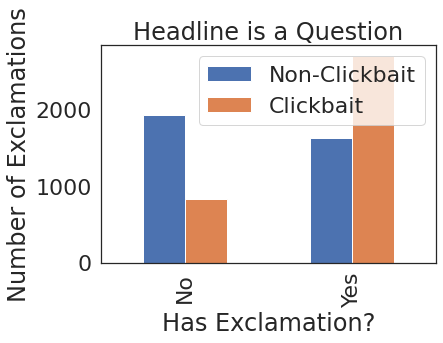

In [ ]:
plot = df.groupby('descExclamation')['classification'].value_counts().unstack().plot.bar()
plot.set_xlabel('Has Exclamation?')
plot.set_ylabel('Number of Exclamations')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline is a Question')

In [ ]:
df

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL,classification,l2d,Uppercase,Lowercase,upperlowratio,count,exclamation,descExclamation,question,link,numbers,subjectDesc,subjectTitle,sentimentDesc,sentimentTitle,avgsentiment,avgsubjectivity
0,wutdQ_kzNn0,marzia has ligma lwiay #0044,Become Sponsor: https://youtube.com/pewdiepie/...,2018-08-03T17:45:01.000Z,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,https://www.youtube.com/watch?v=wutdQ_kzNn0,1,168.493231,109,777,0.140283,5,0,1,0,1,0,0.551515,0.00,0.017803,0.0000,0.002167,0.146833
1,WVaLM-kIZgg,this slinky montage is bizarrely satisfying to...,Happy National Slinky Day! We got our hands on...,2018-08-30T12:00:09.000Z,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,https://www.youtube.com/watch?v=WVaLM-kIZgg,0,0.703704,78,416,0.187500,8,0,1,0,1,0,0.716667,1.00,0.483333,0.5000,-0.013308,0.500732
2,cKAKayQ4F9o,making her dream come true! (make a wish),It was so nice to meet you Trinity 😊\nGET NEW ...,2018-08-07T20:08:28.000Z,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,https://www.youtube.com/watch?v=cKAKayQ4F9o,1,74.550813,175,236,0.741525,8,1,1,0,1,0,0.471970,0.65,0.161600,0.4375,0.101458,0.304167
3,ZwqOoD17_LU,science journalism: crash course statistics #11,We’ve talked a lot in this series about how of...,2018-04-11T21:00:03.000Z,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",https://www.youtube.com/watch?v=ZwqOoD17_LU,0,87.958333,143,1252,0.114217,6,0,1,0,1,0,0.472381,0.00,-0.029762,0.0000,0.286875,0.572019
4,MhXDnHIOP9w,"michelin and general motors unveil airless, pu...",Michelin and General Motors are betting on nea...,2019-06-19T13:09:00.000Z,206468.0,1335.0,96.0,470,Perfect can get spike stripped and still outru...,The tires have been in development for so long...,"How will they do on side loads, like high spee...","Michelin chill out, I work in roadside assista...",They look good but I hope it's enough to hold ...,"When you fail to present the downsides, you ju...",I am definitely going to pick up a set of thes...,Yeah but the real questions are; how much road...,They give

In [ ]:
df["descExclamation"]=df["description"].apply(contains_exclamation)
test["descExclamation"]=test["description"].apply(contains_exclamation)

In [ ]:
df.descExclamation.value_counts()

1    4339
0    2766
Name: descExclamation, dtype: int64

In [ ]:
test['exclamation']=test['title'].apply(contains_exclamation)

In [ ]:
df.exclamation.value_counts()

0    5761
1    1344
Name: exclamation, dtype: int64

In [ ]:
questions = ["what", "which", "Who", "Where", "Why", "When", "How", "Whose", "Who's"]

In [ ]:
def contains_question(title):  # funciton for finding if title has question mark or starts witha question word. 
  if "?" in title or title.startswith(("what", "which", "who", "where", "why", "when", "wow", "whose", "who's", "would", "do")):
    return 1
  else:
    return 0



In [ ]:
df['question']=df['title'].apply(contains_question)

In [ ]:
test['question']=test['title'].apply(contains_question)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7105 non-null   object 
 1   title            7105 non-null   object 
 2   description      7105 non-null   object 
 3   timestamp        7105 non-null   object 
 4   viewCount        7105 non-null   float64
 5   likeCount        7105 non-null   float64
 6   dislikeCount     7105 non-null   float64
 7   commentCount     7105 non-null   int64  
 8   user_comment_1   7105 non-null   object 
 9   user_comment_2   7105 non-null   object 
 10  user_comment_3   7105 non-null   object 
 11  user_comment_4   7105 non-null   object 
 12  user_comment_5   7105 non-null   object 
 13  user_comment_6   7105 non-null   object 
 14  user_comment_7   7105 non-null   object 
 15  user_comment_8   7105 non-null   object 
 16  user_comment_9   7105 non-null   object 
 17  user_comment_1

In [ ]:
df.question.value_counts()

0    6435
1     670
Name: question, dtype: int64

In [ ]:
def contains_link(description):  # funciton for finding if title has question mark or starts witha question word. 
  if "http" in description:
    return 1
  else:
    return 0
df["link"] = df['description'].apply(contains_link)


In [ ]:
df.link.value_counts()

1    6749
0     356
Name: link, dtype: int64

In [ ]:
def contains_number(title):  # function for finding if title starts with a number 
  if title.startswith(('1','2','3','4','5','6','7','8','9','0')):
    return 1
  else:
    return 0
df['numbers']=df['title'].apply(contains_number)

In [ ]:
test['numbers']=test['title'].apply(contains_number)

Text(0.5, 1.0, 'Title has a number?')

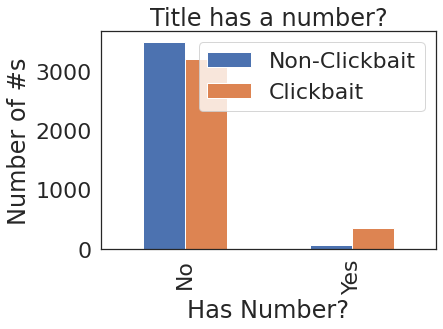

In [ ]:
plot = df.groupby('numbers')['classification'].value_counts().unstack().plot.bar()
plot.set_xlabel('Has Number?')
plot.set_ylabel('Number of #s')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Title has a number?')

In [ ]:
df.numbers.value_counts()

0    6679
1     426
Name: numbers, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
newdf= pd.DataFrame

In [ ]:
def subjectivity_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['sentiment1'] = df['user_comment_1'].apply(sentiment_calc)
df['sentiment2'] = df['user_comment_2'].apply(sentiment_calc)
df['sentiment3'] = df['user_comment_3'].apply(sentiment_calc)
df['sentiment4'] = df['user_comment_4'].apply(sentiment_calc)
df['sentiment5'] = df['user_comment_5'].apply(sentiment_calc)
df['sentiment6'] = df['user_comment_6'].apply(sentiment_calc)
df['sentiment7'] = df['user_comment_7'].apply(sentiment_calc)
df['sentiment8'] = df['user_comment_8'].apply(sentiment_calc)
df['sentiment9'] = df['user_comment_9'].apply(sentiment_calc)
df['sentiment10'] = df['user_comment_10'].apply(sentiment_calc)

In [ ]:

df['sub1'] = df['user_comment_1'].apply(subjectivity_calc)
df['sub2'] = df['user_comment_2'].apply(subjectivity_calc)
df['sub3'] = df['user_comment_3'].apply(subjectivity_calc)
df['sub4'] = df['user_comment_4'].apply(subjectivity_calc)
df['sub5'] = df['user_comment_5'].apply(subjectivity_calc)
df['sub6'] = df['user_comment_6'].apply(subjectivity_calc)
df['sub7'] = df['user_comment_7'].apply(subjectivity_calc)
df['sub8'] = df['user_comment_8'].apply(subjectivity_calc)
df['sub9'] = df['user_comment_9'].apply(subjectivity_calc)
df['sub10'] = df['user_comment_10'].apply(subjectivity_calc)

In [ ]:
df['subjectDesc'] = df['description'].apply(subjectivity_calc)
df['subjectTitle'] = df['title'].apply(subjectivity_calc)

In [ ]:
df['sentimentDesc'] = df['description'].apply(sentiment_calc)
df['sentimentTitle'] = df['title'].apply(sentiment_calc)


In [ ]:
test['sub1'] = test['user_comment_1'].apply(subjectivity_calc)
test['sub2'] = test['user_comment_2'].apply(subjectivity_calc)
test['sub3'] = test['user_comment_3'].apply(subjectivity_calc)
test['sub4'] = test['user_comment_4'].apply(subjectivity_calc)
test['sub5'] = test['user_comment_5'].apply(subjectivity_calc)
test['sub6'] = test['user_comment_6'].apply(subjectivity_calc)
test['sub7'] = test['user_comment_7'].apply(subjectivity_calc)
test['sub8'] = test['user_comment_8'].apply(subjectivity_calc)
test['sub9'] = test['user_comment_9'].apply(subjectivity_calc)
test['sub10'] = test['user_comment_10'].apply(subjectivity_calc)

In [ ]:

test['sentiment1'] = test['user_comment_1'].apply(sentiment_calc)
test['sentiment2'] = test['user_comment_2'].apply(sentiment_calc)
test['sentiment3'] = test['user_comment_3'].apply(sentiment_calc)
test['sentiment4'] = test['user_comment_4'].apply(sentiment_calc)
test['sentiment5'] = test['user_comment_5'].apply(sentiment_calc)
test['sentiment6'] = test['user_comment_6'].apply(sentiment_calc)
test['sentiment7'] = test['user_comment_7'].apply(sentiment_calc)
test['sentiment8'] = test['user_comment_8'].apply(sentiment_calc)
test['sentiment9'] = test['user_comment_9'].apply(sentiment_calc)
test['sentiment10'] = test['user_comment_10'].apply(sentiment_calc)

In [ ]:
test['sentimentDesc'] = test['description'].apply(sentiment_calc)
test['sentimentTitle'] = test['title'].apply(sentiment_calc)

In [ ]:
test['subjectDesc'] = test['description'].apply(subjectivity_calc)
test['subjectTitle'] = test['title'].apply(subjectivity_calc)

In [ ]:
test

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL,l2d,Uppercase,Lowercase,upperlowratio,descExclamation,exclamation,question,numbers,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,sentimentDesc,sentimentTitle,subjectDesc,subjectTitle
0,oRB8lJynqBA,fisherman catches never-before-seen sea creatu...,Fishing results in some lucky catches and some...,2018-08-28T20:00:02.000Z,137551.0,2810.0,184.0,242,I love to go fishing but to catch that no thanks,Brilliant. Nightmares for me tonight ! ! !,I actually saw a Black Scabbardfish in Madeira...,Is it Spongebob?? Oh nope,When you're early but you don't know what to say😐,Our oceans are really mysterious.,You are my fav channel I subbed and hit the b...,20 views and 80 likes yt logic,Well that's enough YouTube for me,Ohhhhhh. Early 👌🏼😁,https://www.youtube.com/watch?v=oRB8lJynqBA,168.493231,29,931,0.031149,1,0,0,0,0.400000,1.000000,0.266667,0.000000,0.300000,1.000000,0.000000,0.0000,0.500000,0.3000,0.2000,1.000000,-0.083333,0.000000,0.100000,0.000000,0.000000,0.000,0.0000,0.10000,0.096429,0.000000,0.577646,0.0
1,of-UPoEnw_w,card throwing speed test,"In this bonus footage, Dan takes on Rick Smith...",2018-03-23T16:00:07.000Z,1158511.0,26708.0,572.0,425,So much fun working with The Slo-Mo Guys! Than...,The way his hand twisted is so amazing to see!,am i the only one that misses the insane low s...,How many more videos do we get? (not complaining),I hope they play their cards right!,Does anyone else miss the little music that pl...,loading videos in slow mo,he didnt get the melon,0:31 is he bowling leg spin😀,The notifications brought me to a playlist tha...,https://www.youtube.com/watch?v=of-UPoEnw_w,0.703704,11,110,0.100000,0,0,0,0,0.200000,0.950000,0.545000,0.500000,0.535714,0.366667,0.400000,0.0000,0.000000,0.3625,0.3125,0.125000,-0.200000,0.500000,0.357143,-0.129167,-0.300000,0.000,0.0000,0.02500,0.011111,0.000000,0.688889,0.0
2,d28cz00HHto,nintendo labo for switch | circuit breaker live,"On the season finale of Circuit Breaker, we ar...",2018-04-24T20:54:38.000Z,19861.0,326.0,40.0,34,I'll miss this show a lot. Your other content ...,This was the best thing the Verge has done. Ve...,I do like having longer shows. It's nice becau...,"Disappointed to see this show end. A fun, casu...",This show came and went fast,The Verge feels like it's changing so much...,Why is this over?! NOOO,Like 90 second on the verge that was an awesom...,YAAAYYY!!! DAMI LEE IS BACK!!!!,You guys kill video shows more than google kil...,https://www.youtube.com/watch?v=d28cz00HHto,74.550813,30,488,0.061475,0,0,0,0,0.671667,0.650000,1.000000,0.478333,0.600000,0.200000,0.000000,0.5000,0.000000,0.5000,0.0350,0.175000,0.600000,-0.175000,0.200000,0.200000,0.000000,0.500,0.0000,0.50000,0.123636,0.136364,0.580000,0.5
3,Tftg_LnwTW0,gym logic! (these make no sense),Send Video Ideas: ReactionTimeVideos@gmail.com...,2018-05-28T20:15:00.000Z,1562674.0,45858.0,887.0,3328,C4N Y0U R34D THIS ??\n\nL34V3 4 L1K3 PL34S3 😊,Wiggle\r\n Wiggle\r\n Wiggle\r\n Wiggle\r\...,Guys I have a theory \n\n\n\n\n\n\n\n\n\n\n\n\...,Anthony: smack that like button!!!\n\nMe: *sma...,I love leg day\n\n\n\n\n\n\n\nIm going to like...,Diet logic: \nHave a healthy day\nHave chocola...,Did anyone notice the power puff girl chairs,Do you want to know who's beautiful?\n\n\n\n\n...,"""You can't hurt your legs if you don't lift th...",Awwwww Anthony looks adorable in that!! 😆💙💙,https://www.youtube.com/watch?v=Tftg_LnwTW0,87.958333,45,251,0.179283,0,1,0,0,0.000000,0.000000,0.500000,0.000000,0.600000,0.500000,0.000000,0.5000,0.000000,1.0000,0.0000,0.000000,0.500000,0.000000,0.500000,0.500000,0.000000,0.425,0.0000,0.78125,0.500000,0.000000,0.500000,0.0
4,qR0mkm65Whk,worst t

In [ ]:
df

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL,classification,l2d,Uppercase,Lowercase,upperlowratio,count,exclamation,descExclamation,question,link,numbers,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,subjectDesc,subjectTitle,sentimentDesc,sentimentTitle
0,wutdQ_kzNn0,marzia has ligma lwiay #0044,Become Sponsor: https://youtube.com/pewdiepie/...,2018-08-03T17:45:01.000Z,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,https://www.youtube.com/watch?v=wutdQ_kzNn0,1,168.493231,109,777,0.140283,5,0,1,0,1,0,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.213333,0.100000,-0.166667,0.375000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.460000,0.200000,0.433333,0.551515,0.00,0.017803,0.0000
1,WVaLM-kIZgg,this slinky montage is bizarrely satisfying to...,Happy National Slinky Day! We got our hands on...,2018-08-30T12:00:09.000Z,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,https://www.youtube.com/watch?v=WVaLM-kIZgg,0,0.703704,78,416,0.187500,8,0,1,0,1,0,0.316667,0.000000,0.136364,0.166667,0.250000,-0.375,0.000000,0.000000,-0.500000,-0.127778,0.566667,0.000000,0.454545,0.416667,0.625000,1.00,0.000000,0.500000,1.000000,0.444444,0.716667,1.00,0.483333,0.5000
2,cKAKayQ4F9o,making her dream come true! (make a wish),It was so nice to meet you Trinity 😊\nGET NEW ...,2018-08-07T20:08:28.000Z,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,https://www.youtube.com/watch?v=cKAKayQ4F9o,1,74.550813,175,236,0.741525,8,1,1,0,1,0,0.000000,0.000000,0.300000,0.056250,0.433333,-0.100,0.450000,0.000000,-0.125000,0.000000,0.000000,0.100000,0.450000,0.200000,0.666667,0.30,0.500000,0.000000,0.825000,0.000000,0.471970,0.65,0.161600,0.4375
3,ZwqOoD17_LU,science journalism: crash course statistics #11,We’ve talked a lot in this series about how of...,2018-04-11T21:00:03.000Z,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",https://www.youtube.com/watch?v=ZwqOoD17_LU,0,87.958333,143,1252,0.114217,6,0,1,0,1,0,0.006250,0.600000,0.000000

In [ ]:
newdf = df[['sentiment1', 'sentiment2', 'sentiment3', 'sentiment4', 'sentiment5', 'sentiment6', 'sentiment7', 'sentiment8', 'sentiment9', 'sentiment10']]


In [ ]:
newdftest = test[['sentiment1', 'sentiment2', 'sentiment3', 'sentiment4', 'sentiment5', 'sentiment6', 'sentiment7', 'sentiment8', 'sentiment9', 'sentiment10']]

In [ ]:
newdf2 = df[['sub1','sub2','sub3','sub4','sub5','sub6','sub7','sub8', 'sub9', 'sub10']]
newdf2test = test[['sub1','sub2','sub3','sub4','sub5','sub6','sub7','sub8', 'sub9', 'sub10']]

In [ ]:
newdf['mean'] = newdf.mean(axis=1)
newdf2['submean'] = newdf2.mean(axis=1)
newdftest['mean'] = newdftest.mean(axis=1)
newdf2test['submean'] = newdf2test.mean(axis=1)

In [ ]:
newdf

,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,sentiment9,sentiment10,mean
0,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.213333,0.100000,-0.166667,0.002167
1,0.316667,0.000000,0.136364,0.166667,0.250000,-0.375,0.000000,0.000000,-0.500000,-0.127778,-0.013308
2,0.000000,0.000000,0.300000,0.056250,0.433333,-0.100,0.450000,0.000000,-0.125000,0.000000,0.101458
3,0.006250,0.600000,0.000000,0.600000,0.812500,0.700,0.050000,0.000000,0.200000,-0.100000,0.286875
4,1.000000,0.120000,0.160000,0.016667,0.266667,-0.250,0.000000,0.200000,-0.375000,0.000000,0.113833
...,...,...,...,...,...,...,...,...,...,...,...
7100,0.100000,0.183333,0.000000,0.733333,0.191667,0.000,-0.600000,0.000000,0.059375,0.500000,0.116771
7101,0.200000,-0.170833,0.280159,-0.200000,0.000000,-0.025,0.225000,-0.200000,0.937500,0.085938,0.113276
7102,0.000000,0.000000,0.000000,0.100000,0.000000,0.200,0.000000,0.000000,0.000000,0.000000,0.030000
7103,0.175000,-0.050000,0.000000,0.500000,0.200000,0.000,0.000000,0.000000,0.000000,0.000000,0.082500


In [ ]:
newdf2

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,submean
0,0.375000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.460000,0.200000,0.433333,0.146833
1,0.566667,0.000000,0.454545,0.416667,0.625000,1.00,0.000000,0.500000,1.000000,0.444444,0.500732
2,0.000000,0.100000,0.450000,0.200000,0.666667,0.30,0.500000,0.000000,0.825000,0.000000,0.304167
3,0.465476,1.000000,0.000000,1.000000,0.875000,0.80,0.391667,0.257692,0.630357,0.300000,0.572019
4,1.000000,0.596667,0.540000,0.233333,0.483333,0.15,0.500000,0.250000,0.400000,0.355556,0.450889
...,...,...,...,...,...,...,...,...,...,...,...
7100,0.466667,0.380952,0.050000,0.783333,0.391667,0.00,0.400000,0.000000,0.457589,0.433333,0.336354
7101,0.200000,0.266667,0.643210,0.800000,0.000000,0.30,0.325000,0.600000,1.000000,0.337500,0.447238
7102,0.000000,0.000000,0.100000,0.700000,0.000000,0.10,0.000000,0.000000,0.000000,0.000000,0.090000
7103,0.244444,0.150000,0.000000,0.500000,0.200000,0.00,0.000000,0.000000,0.000000,0.400000,0.149444


In [ ]:
df= df.drop(['sentiment1', 'sentiment2', 'sentiment3', 'sentiment4', 'sentiment5', 'sentiment6', 'sentiment7', 'sentiment8', 'sentiment9', 'sentiment10',
            'sub1','sub2','sub3','sub4','sub5','sub6','sub7','sub8', 'sub9', 'sub10'], axis =1)

In [ ]:
df["avgsentiment"] = newdf['mean']
df["avgsubjectivity"] = newdf2['submean']
test["avgsentiment"] = newdftest['mean']
test["avgsubjectivity"] = newdf2test['submean']

In [ ]:
df

,ID,title,description,timestamp,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,URL,classification,l2d,Uppercase,Lowercase,upperlowratio,count,exclamation,descExclamation,question,link,numbers,subjectDesc,subjectTitle,sentimentDesc,sentimentTitle,avgsentiment,avgsubjectivity
0,wutdQ_kzNn0,marzia has ligma lwiay #0044,Become Sponsor: https://youtube.com/pewdiepie/...,2018-08-03T17:45:01.000Z,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,https://www.youtube.com/watch?v=wutdQ_kzNn0,1,168.493231,109,777,0.140283,5,0,1,0,1,0,0.551515,0.00,0.017803,0.0000,0.002167,0.146833
1,WVaLM-kIZgg,this slinky montage is bizarrely satisfying to...,Happy National Slinky Day! We got our hands on...,2018-08-30T12:00:09.000Z,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,https://www.youtube.com/watch?v=WVaLM-kIZgg,0,0.703704,78,416,0.187500,8,0,1,0,1,0,0.716667,1.00,0.483333,0.5000,-0.013308,0.500732
2,cKAKayQ4F9o,making her dream come true! (make a wish),It was so nice to meet you Trinity 😊\nGET NEW ...,2018-08-07T20:08:28.000Z,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,https://www.youtube.com/watch?v=cKAKayQ4F9o,1,74.550813,175,236,0.741525,8,1,1,0,1,0,0.471970,0.65,0.161600,0.4375,0.101458,0.304167
3,ZwqOoD17_LU,science journalism: crash course statistics #11,We’ve talked a lot in this series about how of...,2018-04-11T21:00:03.000Z,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",https://www.youtube.com/watch?v=ZwqOoD17_LU,0,87.958333,143,1252,0.114217,6,0,1,0,1,0,0.472381,0.00,-0.029762,0.0000,0.286875,0.572019
4,MhXDnHIOP9w,"michelin and general motors unveil airless, pu...",Michelin and General Motors are betting on nea...,2019-06-19T13:09:00.000Z,206468.0,1335.0,96.0,470,Perfect can get spike stripped and still outru...,The tires have been in development for so long...,"How will they do on side loads, like high spee...","Michelin chill out, I work in roadside assista...",They look good but I hope it's enough to hold ...,"When you fail to present the downsides, you ju...",I am definitely going to pick up a set of thes...,Yeah but the real questions are; how much road...,They give

In [ ]:
X =  df[["Uppercase", "Lowercase", "upperlowratio", "dislikeCount", "commentCount", "question", "exclamation", "numbers", "descExclamation", 'avgsentiment','sentimentDesc','sentimentTitle', 'subjectDesc', 'subjectTitle', 'avgsubjectivity' ]] #72 
Y = df["classification"]

#'sentiment1', 'sentiment2', 'sentiment3', 'sentiment4', 'sentiment5', 'sentiment6', 'sentiment7', 'sentiment8', 'sentiment9', 'sentiment10'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(random_state = 2)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Accuracy of LR Classifier:', model.score(X_test, y_test))

Accuracy of LR Classifier: 0.7558057705840957


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:

model2 = RandomForestClassifier( n_estimators = 50, min_samples_split = 10, max_depth = 15)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [ ]:
print('Accuracy of RF Classifier:', model2.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred, average='binary'))

Accuracy of RF Classifier: 0.9479239971850809
F1 score: 0.9491758241758242


In [ ]:
gnb = GaussianNB()
y_pred2 = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print('Accuracy of RF Classifier:', model2.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred2, average='binary'))

Accuracy of RF Classifier: 0.9479239971850809
F1 score: 0.3672131147540984


In [ ]:
predictdf = test[["Uppercase", "Lowercase", "upperlowratio", "dislikeCount", "commentCount", "question", "exclamation", "numbers", "descExclamation", 'avgsentiment','sentimentDesc','sentimentTitle', 'subjectDesc', 'subjectTitle', 'avgsubjectivity' ]]

In [ ]:
predictdf.head()

,Uppercase,Lowercase,upperlowratio,dislikeCount,commentCount,question,exclamation,numbers,descExclamation,avgsentiment,sentimentDesc,sentimentTitle,subjectDesc,subjectTitle,avgsubjectivity
0,29,931,0.031149,184.0,242,0,0,0,1,0.131667,0.096429,0.000000,0.577646,0.0,0.376667
1,11,110,0.100000,572.0,425,0,0,0,0,0.069048,0.011111,0.000000,0.688889,0.0,0.385988
2,30,488,0.061475,40.0,34,0,0,0,0,0.203500,0.123636,0.136364,0.580000,0.5,0.460000
3,45,251,0.179283,887.0,3328,0,1,0,0,0.270625,0.500000,0.000000,0.500000,0.0,0.310000
4,33,191,0.172775,1490.0,7388,0,1,0,0,0.032381,0.500000,-1.000000,0.500000,1.0,0.345238


In [ ]:
submission = model2.predict(predictdf)

In [ ]:
subdf = pd.DataFrame(submission)

In [ ]:
subdf = pd.DataFrame(submission)
subdf["ID"] = test["ID"]
subdf.head()
subdf["class"] = subdf[0]
subdf = subdf.drop(columns=[0])
subdf["class"] = subdf["class"].astype(bool)
subdf.to_csv("blobsub1.csv")